In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


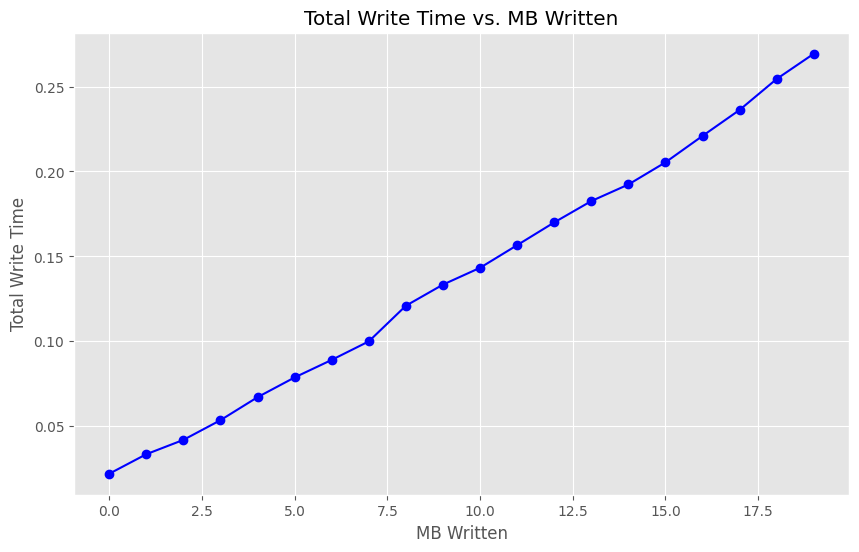

In [8]:
mb_written = []
total_write_time = []

# Read the data from the file
with open("./Scalability_single_client/write_log.txt", "r") as file:
    for line in file:
        parts = line.strip().split(", ")
        mb = float(parts[0])
        time = float(parts[1])
        mb_written.append(mb)
        total_write_time.append(time)

# Convert lists to numpy arrays for plotting
mb_written = np.array(mb_written)
total_write_time = np.array(total_write_time)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(mb_written, total_write_time, marker='o', linestyle='-', color='b')
plt.xlabel("MB Written")
plt.ylabel("Total Write Time")
plt.title("Total Write Time vs. MB Written")
plt.grid(True)

# Show the plot
plt.show()